# Visualització gràfica de múltiples variables.

## Exercici 2
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

Important

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('Documents\movies.dat',encoding='ISO-8859-1', sep='::', engine='python', names=['Id_Peli','Peli', 'Genero'])
df

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\nuria\AppData\Local\Temp\ipykernel_14444\1967520637.py:6: SyntaxWarning: invalid escape sequence '\m'
  df =pd.read_csv('Documents\movies.dat',encoding='ISO-8859-1', sep='::', engine='python', names=['Id_Peli','Peli', 'Genero'])


,Id_Peli,Peli,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id_Peli  3883 non-null   int64 
 1   Peli     3883 non-null   object
 2   Genero   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [4]:
df['Peli'].value_counts()

Peli
Toy Story (1995)                           1
Buena Vista Social Club (1999)             1
Son of Frankenstein (1939)                 1
Ghost of Frankenstein, The (1942)          1
Frankenstein Meets the Wolf Man (1943)     1
                                          ..
Kids of Survival (1993)                    1
Alien³ (1992)                              1
American Werewolf in London, An (1981)     1
Amityville 1992: It's About Time (1992)    1
Contender, The (2000)                      1
Name: count, Length: 3883, dtype: int64

In [5]:
genero = df['Genero'].str.split('|', expand=True)
genero

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [6]:
df['Genero']=genero[0]
df

,Id_Peli,Peli,Genero
0,1,Toy Story (1995),Animation
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [7]:
df['Año'] = df['Peli'].str.extract(r'\((\d{4})\)').astype(int) 
df['Peli'] = df['Peli'].str.replace(r'\(\d{4}\)', '', regex=True)
df

,Id_Peli,Peli,Genero,Año
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [8]:
df.drop(['Id_Peli'], axis=1)

,Peli,Genero,Año
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


In [9]:
df.notnull().sum()

Id_Peli    3883
Peli       3883
Genero     3883
Año        3883
dtype: int64

## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

<Axes: xlabel='Año', ylabel='Genero'>

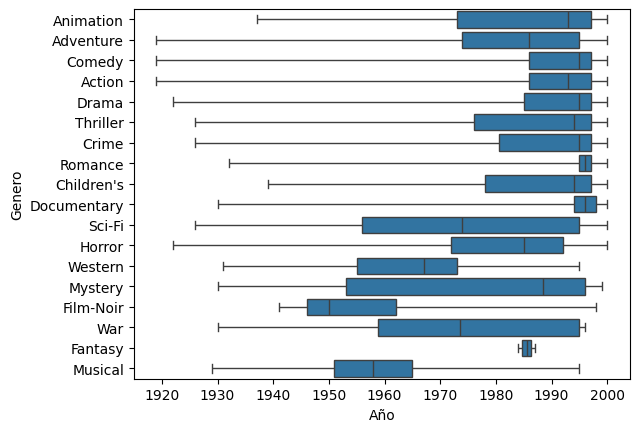

In [13]:
sns.boxplot(data=df, x="Año", y="Genero",  whis=(0, 100))

Así podemos visualizar como evolucionan los generos según el año y ver en que franja de años tienen más cantidad.

Text(0.5, 0, 'Generos')

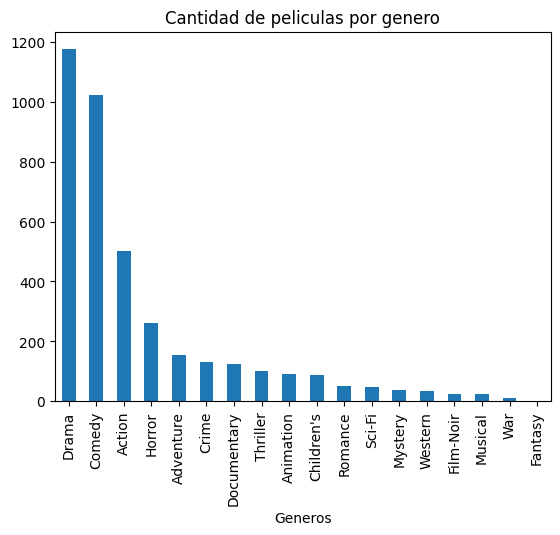

In [11]:
df['Genero'].value_counts().plot(kind='bar')
plt.title("Cantidad de peliculas por genero")
plt.xlabel('Generos')

El genero con más frecuencia es drama.

Text(0.5, 0, 'Años')

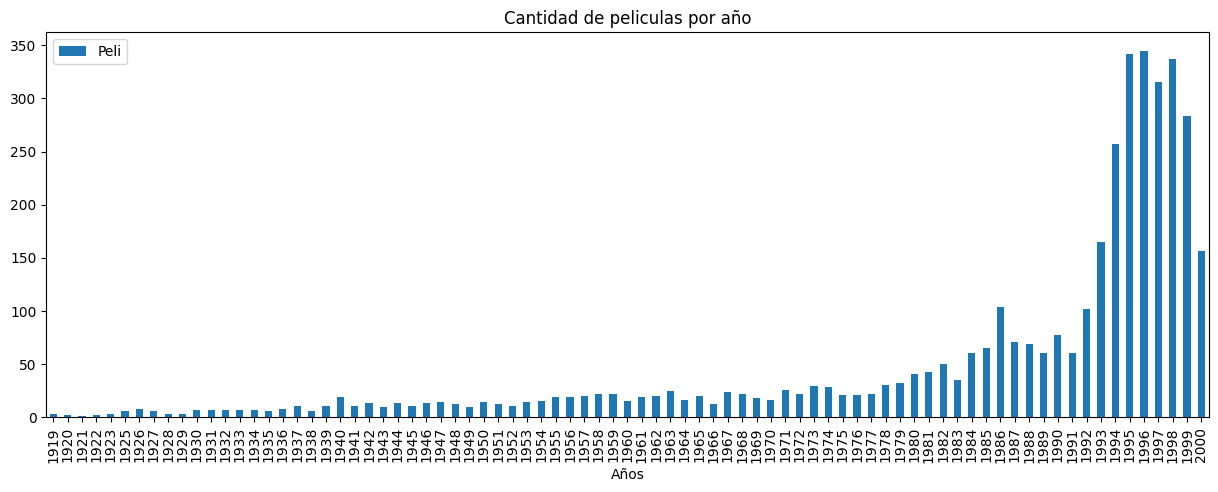

In [12]:
df[['Año','Peli']].groupby('Año').count().plot(kind='bar',figsize=(15,5))

plt.title("Cantidad de peliculas por año")
plt.xlabel('Años')

A partir de los 80 empieza a subir la cantidad de peliculas con un pico en 1986.
Sin embargo no es hasta los 90 que no hay un augmento muy significavo en la cantidad de peliculas.